In [ ]:
### Stantistic Analysis of Yearly Return and Moving

In [5]:
## Import Dependencies
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import csv
import requests
from pprint import pprint
from datetime import datetime, timedelta
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress

import yfinance as yf
## https://www.ssga.com/us/en/intermediary/etfs/funds/spdr-sp-500-etf-trust-spy#holdings

sp500_df = pd.read_csv('s&p500.csv')

In [6]:
 ## 1. Calculate the weighted yearly return moving and create a DF 


In [7]:
#read the 500 stocks data
merge_df = pd.read_csv('../output_data/merge.csv')
del merge_df["Unnamed: 0"]
merge_df

,Ticker,Year,Highest,Lowest,Open,Close,Yearly Return (%),Yearly Moving (%),Name,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428,1.300062,49.348231,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999,39.047648,69.840952,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001,-5.503185,46.239123,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000,12.873988,32.658993,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499,46.139889,54.409196,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4878,DISH,2018,50.490002,23.219999,48.410000,24.969999,-48.419749,117.441874,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD
4879,DISH,2019,44.660000,24.250000,24.350000,35.470001,45.667354,84.164948,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD
4880,DISH,2020,42.619999,17.090000,35.869999,32.340000,-9.841090,149.385597,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD
4881,DISH,2021,47.049999,28.530001,32.430000,32.439999,0.030830,64.914119,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD


In [8]:
# Calculated the Weighted Yearly Return and Moving
merge_df["Weighted Yearly Return"] = merge_df["Yearly Return (%)"]*merge_df["Weight"]
merge_df["Weighted Yearly Moving"] = merge_df["Yearly Moving (%)"]*merge_df["Weight"]
merge_df

,Ticker,Year,Highest,Lowest,Open,Close,Yearly Return (%),Yearly Moving (%),Name,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency,Weighted Yearly Return,Weighted Yearly Moving
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428,1.300062,49.348231,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,9.243800,350.879490
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999,39.047648,69.840952,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,277.639515,496.588378
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001,-5.503185,46.239123,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,-39.129156,328.772881
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000,12.873988,32.658993,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,91.537594,232.214420
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499,46.139889,54.409196,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,328.067298,386.864348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4878,DISH,2018,50.490002,23.219999,48.410000,24.969999,-48.419749,117.441874,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,-0.257545,0.624673
4879,DISH,2019,44.660000,24.250000,24.350000,35.470001,45.667354,84.164948,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,0.242905,0.447673
4880,DISH,2020,42.619999,17.090000,35.869999,32.340000,-9.841090,149.385597,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,-0.052345,0.794582
4881,DISH,2021,47.049999,28.530001,32.430000,32.439999,0.030830,64.914119,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,0.000164,0.345278


In [9]:
# Calculate the Price-to-Earnings (P/E) Ratio of each company\
merge_df["P/E Ratio"] = merge_df["Yearly Return (%)"]/merge_df["Close"]
merge_df

,Ticker,Year,Highest,Lowest,Open,Close,Yearly Return (%),Yearly Moving (%),Name,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency,Weighted Yearly Return,Weighted Yearly Moving,P/E Ratio
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428,1.300062,49.348231,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,9.243800,350.879490,0.064885
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999,39.047648,69.840952,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,277.639515,496.588378,1.415026
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001,-5.503185,46.239123,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,-39.129156,328.772881,-0.209127
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000,12.873988,32.658993,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,91.537594,232.214420,0.444621
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499,46.139889,54.409196,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,328.067298,386.864348,1.090584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4878,DISH,2018,50.490002,23.219999,48.410000,24.969999,-48.419749,117.441874,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,-0.257545,0.624673,-1.939117
4879,DISH,2019,44.660000,24.250000,24.350000,35.470001,45.667354,84.164948,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,0.242905,0.447673,1.287492
4880,DISH,2020,42.619999,17.090000,35.869999,32.340000,-9.841090,149.385597,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,-0.052345,0.794582,-0.304301
4881,DISH,2021,47.049999,28.530001,32.430000,32.439999,0.030830,64.914119,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,0.000164,0.345278,0.000950


In [12]:
## 2. Grouped the date by SECTORs and Caculate the Return and moving

In [17]:
# Calculate the average yearly return for each sector
grouped = merge_df.groupby(["Sector","Year"])
mean_return_sector = grouped["Weighted Yearly Return"].mean()
return_df = pd.DataFrame(mean_return_sector)
return_df = return_df.reset_index().rename(columns={'index': 'Sector'})
return_df

,Sector,Year,Weighted Yearly Return
0,Communication Services,2013,25.335798
1,Communication Services,2014,2.902466
2,Communication Services,2015,13.241167
3,Communication Services,2016,4.091127
4,Communication Services,2017,10.875608
...,...,...,...
105,Utilities,2018,0.163513
106,Utilities,2019,2.426936
107,Utilities,2020,-0.075121
108,Utilities,2021,1.355889


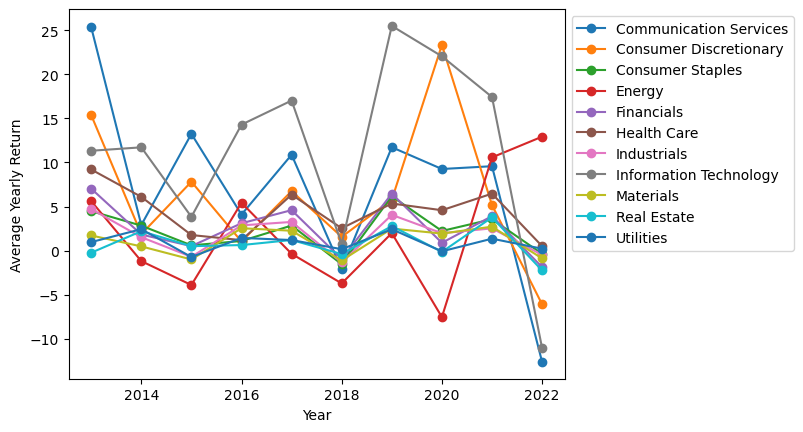

In [18]:
fig, ax = plt.subplots()

for sector in return_df['Sector'].unique():
    subset = return_df[return_df0['Sector'] == sector]
    ax.plot(subset['Year'], subset['Weighted Yearly Return'], marker='o', linestyle='-', label=sector)

ax.set_xlabel('Year')
ax.set_ylabel('Average Yearly Return')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [19]:
# Calculate the weight yearly moving for each sector(weighted-mean())
grouped = merge_df.groupby(["Sector","Year"])
weighted_moving_sector=grouped["Weighted Yearly Moving"].mean()
moving_df = pd.DataFrame(weighted_moving_sector)
moving_df = moving_df.reset_index().rename(columns={'index': 'Sector'})
moving_df = moving_df.rename(columns={0: "Weighted Yearly Moving"})
moving_df

,Sector,Year,Weighted Yearly Moving
0,Communication Services,2013,32.508770
1,Communication Services,2014,13.163667
2,Communication Services,2015,22.023521
3,Communication Services,2016,13.394258
4,Communication Services,2017,15.596372
...,...,...,...
105,Utilities,2018,3.324006
106,Utilities,2019,5.103118
107,Utilities,2020,8.018645
108,Utilities,2021,3.048522


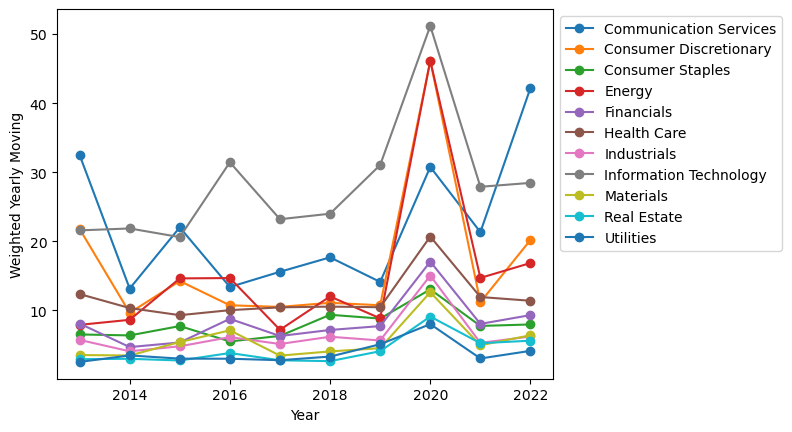

In [21]:
# Plot the moving data
fig, ax = plt.subplots()

for sector in moving_df['Sector'].unique():
    subset = moving_df[moving_df['Sector'] == sector]
    ax.plot(subset['Year'], subset['Weighted Yearly Moving'], marker='o', linestyle='-', label=sector)

ax.set_xlabel('Year')
ax.set_ylabel('Weighted Yearly Moving')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [22]:
## 3. Demonstrate calculating the variance and standard deviation using the different modulesTen year Return Analysis

In [23]:
return_df

,Sector,Year,Weighted Yearly Return
0,Communication Services,2013,25.335798
1,Communication Services,2014,2.902466
2,Communication Services,2015,13.241167
3,Communication Services,2016,4.091127
4,Communication Services,2017,10.875608
...,...,...,...
105,Utilities,2018,0.163513
106,Utilities,2019,2.426936
107,Utilities,2020,-0.075121
108,Utilities,2021,1.355889


In [25]:
# build a sector list, data store list
sectors = list(return_df["Sector"].unique())
names = []
means = []
stds = []

In [26]:
def sectorSA(name):
    data = return_df.loc[return_df["Sector"]==f"{name}"]
    weighted_yearly_return = data['Weighted Yearly Return']
    mean_numpy = np.mean(weighted_yearly_return)
    var_numpy = np.var(weighted_yearly_return,ddof = 0)
    sd_numpy = np.std(weighted_yearly_return,ddof = 0)
    return (name,mean_numpy,var_numpy,sd_numpy)

In [27]:
for sector in sectors:
    names.append(sectorSA(sector)[0])
    means.append(sectorSA(sector)[1])
    stds.append(sectorSA(sector)[3])

In [28]:
return_sa_df = pd.DataFrame({"Sector":names,
                            "Average Weighted Annual Return(%)":means,
                            "Standard Deviation":stds})

return_sa_df =return_sa_df.sort_values("Average Weighted Annual Return(%)", ascending=False)
return_sa_df = return_sa_df.set_index("Sector")
return_sa_df

,Average Weighted Annual Return(%),Standard Deviation
Sector,,
Information Technology,11.284620,10.305469
Communication Services,7.225362,9.577423
Consumer Discretionary,6.258537,7.743128
Health Care,4.405284,2.661025
Financials,2.550679,2.847104
Consumer Staples,2.192662,2.190075
Energy,1.984219,6.258983
Industrials,1.840828,1.969681
Materials,1.116946,1.506889


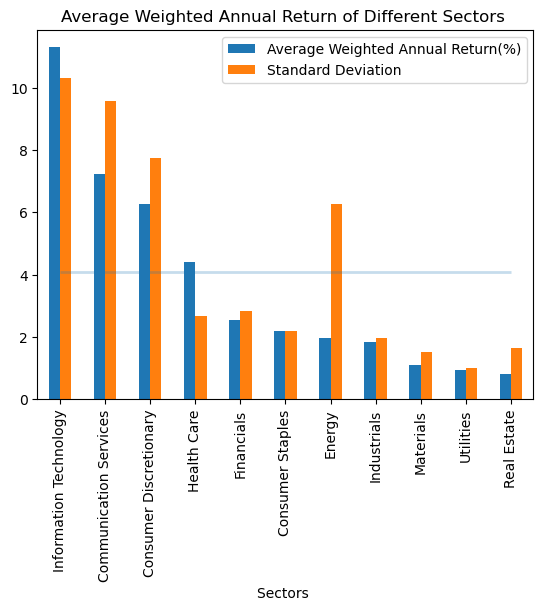

In [29]:
return_sa_df.plot(kind="bar")
plt.hlines(4.1, 0, 10, alpha=0.25,linewidth=2)
plt.title("Average Weighted Annual Return of Different Sectors ")
plt.xlabel("Sectors ")
plt.show()

In [30]:
## anova_exercise

In [31]:
# Extract individual groups
group0 = return_df[return_df["Sector"] == "Communication Services"]["Weighted Yearly Return"]
group1 = return_df[return_df["Sector"] == "Consumer Discretionary"]["Weighted Yearly Return"]
group2 = return_df[return_df["Sector"] == "Consumer Staples"]["Weighted Yearly Return"]
group3 = return_df[return_df["Sector"] == "Energy"]["Weighted Yearly Return"]
group4 = return_df[return_df["Sector"] == "Financials"]["Weighted Yearly Return"]
group5 = return_df[return_df["Sector"] == "Health Care"]["Weighted Yearly Return"]
group6 = return_df[return_df["Sector"] == "Industrials"]["Weighted Yearly Return"]
group7 = return_df[return_df["Sector"] == "Information Technology"]["Weighted Yearly Return"]
group8 = return_df[return_df["Sector"] == "Materials"]["Weighted Yearly Return"]
group9 = return_df[return_df["Sector"] == "Real Estate"]["Weighted Yearly Return"]
group10 = return_df[return_df["Sector"] == "Utilities"]["Weighted Yearly Return"]

In [32]:
stats.f_oneway(group0, group1, group2, group3, group4,group5, group6, group7, group8, group9,group10)

F_onewayResult(statistic=3.31943407373718, pvalue=0.0009433338207252834)

In [33]:
stats.f_oneway(group0, group1, group2)

F_onewayResult(statistic=1.2306639098853447, pvalue=0.3079672553137483)

In [34]:
stats.f_oneway(group8, group9, group10)

F_onewayResult(statistic=0.10647911048733989, pvalue=0.899369436807204)

In [36]:
moving_df

,Sector,Year,Weighted Yearly Moving
0,Communication Services,2013,32.508770
1,Communication Services,2014,13.163667
2,Communication Services,2015,22.023521
3,Communication Services,2016,13.394258
4,Communication Services,2017,15.596372
...,...,...,...
105,Utilities,2018,3.324006
106,Utilities,2019,5.103118
107,Utilities,2020,8.018645
108,Utilities,2021,3.048522


In [37]:
# build a sector list, data store list
sectors = list(return_df["Sector"].unique())
names = []
means = []
stds = []

In [38]:
def sectorSA2(name):
    data = moving_df.loc[return_df["Sector"]==f"{name}"]
    weighted_yearly_moving = data['Weighted Yearly Moving']
    mean_numpy = np.mean(weighted_yearly_moving)
    var_numpy = np.var(weighted_yearly_moving,ddof = 0)
    sd_numpy = np.std(weighted_yearly_moving,ddof = 0)
    return (name,mean_numpy,var_numpy,sd_numpy)

In [39]:
for sector in sectors:
    names.append(sectorSA2(sector)[0])
    means.append(sectorSA2(sector)[1])
    stds.append(sectorSA2(sector)[3])

In [40]:
moving_sa_df = pd.DataFrame({"Sector":names,
                            "Average Annual Moving(%)":means,
                            "Standard Deviation":stds})

moving_sa_df =moving_sa_df.sort_values("Average Annual Moving(%)")
moving_sa_df = moving_sa_df.set_index("Sector")
moving_sa_df

,Average Annual Moving(%),Standard Deviation
Sector,,
Utilities,3.851031,1.558184
Real Estate,4.208079,1.921239
Materials,5.563839,2.639724
Industrials,6.434239,2.944120
Consumer Staples,7.944126,2.047616
Financials,8.258411,3.246675
Health Care,11.756471,3.100334
Energy,15.165836,10.824350
Consumer Discretionary,16.634250,10.631663


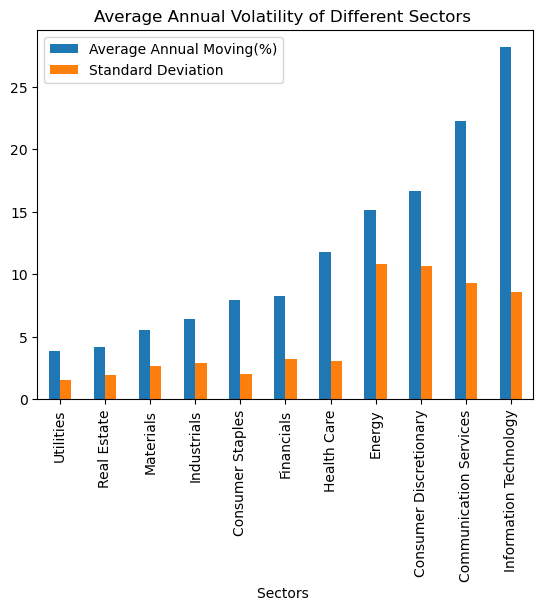

In [41]:
ax = moving_sa_df.plot(kind="bar")
plt.title("Average Annual Volatility of Different Sectors ")
plt.xlabel("Sectors ")
plt.show()

In [42]:
merge_df2 = pd.merge(return_sa_df, moving_sa_df, on="Sector")
merge_df2.head(25)

,Average Weighted Annual Return(%),Standard Deviation_x,Average Annual Moving(%),Standard Deviation_y
Sector,,,,
Information Technology,11.284620,10.305469,28.127868,8.548264
Communication Services,7.225362,9.577423,22.280298,9.322287
Consumer Discretionary,6.258537,7.743128,16.634250,10.631663
Health Care,4.405284,2.661025,11.756471,3.100334
Financials,2.550679,2.847104,8.258411,3.246675
Consumer Staples,2.192662,2.190075,7.944126,2.047616
Energy,1.984219,6.258983,15.165836,10.824350
Industrials,1.840828,1.969681,6.434239,2.944120
Materials,1.116946,1.506889,5.563839,2.639724


In [43]:
del merge_df2["Standard Deviation_x"]
del merge_df2["Standard Deviation_y"]


In [44]:
merge_df2

,Average Weighted Annual Return(%),Average Annual Moving(%)
Sector,,
Information Technology,11.284620,28.127868
Communication Services,7.225362,22.280298
Consumer Discretionary,6.258537,16.634250
Health Care,4.405284,11.756471
Financials,2.550679,8.258411
Consumer Staples,2.192662,7.944126
Energy,1.984219,15.165836
Industrials,1.840828,6.434239
Materials,1.116946,5.563839


In [45]:
x_value=merge_df2["Average Weighted Annual Return(%)"]
y_value=merge_df2["Average Annual Moving(%)"]

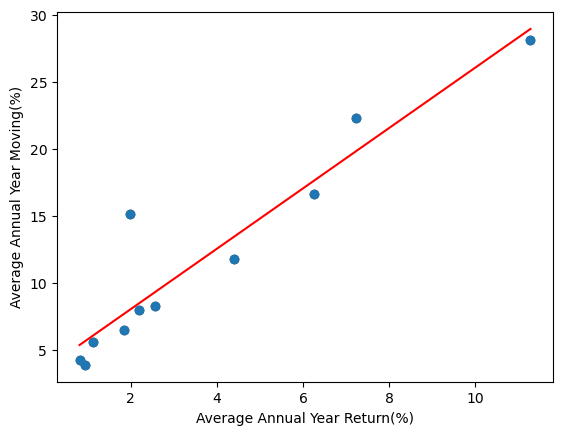

In [46]:
plt.scatter(x_value,y_value, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Average Annual Year Return(%)")
plt.ylabel("Average Annual Year Moving(%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(20,50),fontsize=15,color="red")

plt.show()

In [47]:
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.8889088097259327


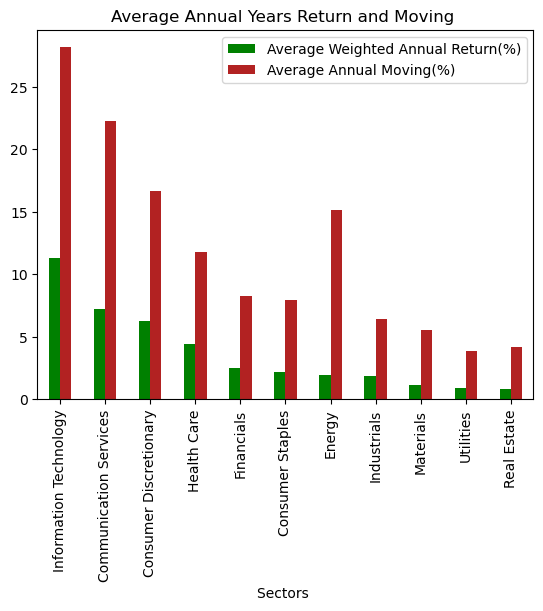

In [49]:

ax = merge_df2.plot(kind="bar",color =["green","firebrick"])
plt.title("Average Annual Years Return and Moving ")
plt.xlabel("Sectors ")
plt.show()